In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
import pickle
import random
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential, load_model
from keras.layers import Conv1D, Conv2D, MaxPool2D, Dense, Flatten, Dropout, LSTM, Permute, TimeDistributed, Bidirectional,GRU
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.layers import Input, GlobalAveragePooling2D, BatchNormalization, Activation, MaxPooling2D
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


In [4]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [5]:
Dataset="/content/drive/MyDrive/Signature/BHSig260-Bengali/dataset"
Data_Dir=os.listdir(Dataset)
print(Data_Dir)

['98', '95', '99', '97', '96', '94', '93', '92', '91', '90', '89', '87', '9', '86', '88', '85', '84', '83', '82', '81', '80', '78', '77', '79', '8', '76', '75', '74', '73', '72', '7', '68', '70', '69', '71', '67', '66', '65', '64', '63', '59', '61', '62', '6', '60', '58', '57', '56', '55', '54', '5', '50', '52', '53', '51', '49', '48', '47', '46', '45', '43', '42', '41', '44', '40', '4', '39', '38', '37', '36', '35', '34', '29', '28', '31', '30', '3', '33', '32', '27', '26', '25', '24', '23', '21', '22', '19', '20', '2', '18', '17', '16', '15', '14', '13', '1', '0', '12', '11', '10']


In [6]:
images = []
classNo = []
classes = 100
epochs_val = 30
batch_size = 64
imageDimensions = (100,360,3)

In [7]:
# Load the saved arrays
X_train = np.load('/content/drive/MyDrive/Signature/BHSig260-Bengali/data_360_100/X_train.npy')
X_test = np.load('/content/drive/MyDrive/Signature/BHSig260-Bengali/data_360_100/X_test.npy')
y_train = np.load('/content/drive/MyDrive/Signature/BHSig260-Bengali/data_360_100/y_train.npy')
y_test = np.load('/content/drive/MyDrive/Signature/BHSig260-Bengali/data_360_100/y_test.npy')

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4320, 360, 100, 1) (1080, 360, 100, 1) (4320, 100) (1080, 100)


In [8]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same' , activation ='relu',input_shape = (imageDimensions[1],imageDimensions[0],1)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same' , activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same' , activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same' , activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same' , activation ='relu'))
model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same' , activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(1,2), strides=(1,2)))
model.add(Dropout(0.25))
model.add(TimeDistributed(Flatten()))
model.add(Bidirectional(GRU(256,return_sequences=True)))
model.add(Flatten())
model.add(Dense(256 , activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 360, 100, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 360, 100, 64)      36928     
                                                                 
 batch_normalization (BatchN  (None, 360, 100, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 180, 50, 64)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 180, 50, 64)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 50, 128)      7

In [10]:
history = model.fit(X_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=epochs_val, 
                    validation_data=(X_test, y_test))

Epoch 1/30
68/68 [==============================] - 96s 929ms/step - loss: 2.7165 - accuracy: 0.4359 - val_loss: 7.9142 - val_accuracy: 0.0296
Epoch 2/30
68/68 [==============================] - 48s 707ms/step - loss: 0.8207 - accuracy: 0.8792 - val_loss: 9.0208 - val_accuracy: 0.0148
Epoch 3/30
68/68 [==============================] - 48s 713ms/step - loss: 0.3098 - accuracy: 0.9660 - val_loss: 7.9137 - val_accuracy: 0.1019
Epoch 4/30
68/68 [==============================] - 49s 721ms/step - loss: 0.1452 - accuracy: 0.9903 - val_loss: 7.1799 - val_accuracy: 0.0926
Epoch 5/30
68/68 [==============================] - 49s 721ms/step - loss: 0.0467 - accuracy: 1.0000 - val_loss: 0.7530 - val_accuracy: 0.8093
Epoch 6/30
68/68 [==============================] - 49s 721ms/step - loss: 0.0226 - accuracy: 1.0000 - val_loss: 0.2101 - val_accuracy: 0.9556
Epoch 7/30
68/68 [==============================] - 49s 724ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.2425 - val_accuracy: 0.9556

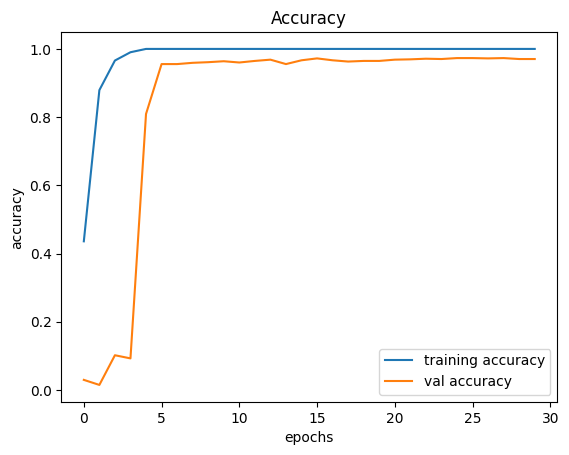

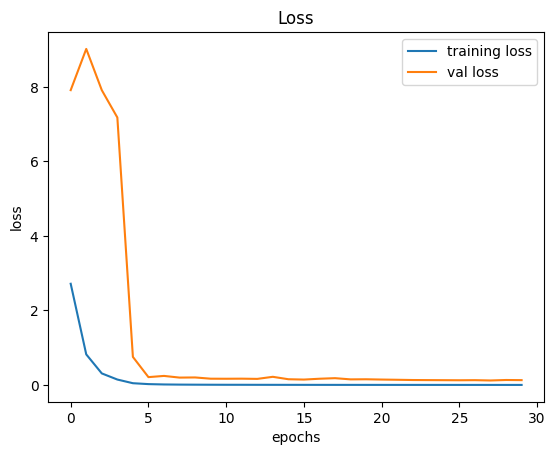

In [11]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
score = model.evaluate(X_train, y_train, verbose=0)
print('Train accuracy:', score[1])

Train accuracy: 1.0


In [13]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.970370352268219


In [14]:
pred = np.argmax(model.predict(X_test), axis = 1)

34/34 [==============================] - 6s 74ms/step


In [15]:
actual=np.argmax(y_test, axis = 1)

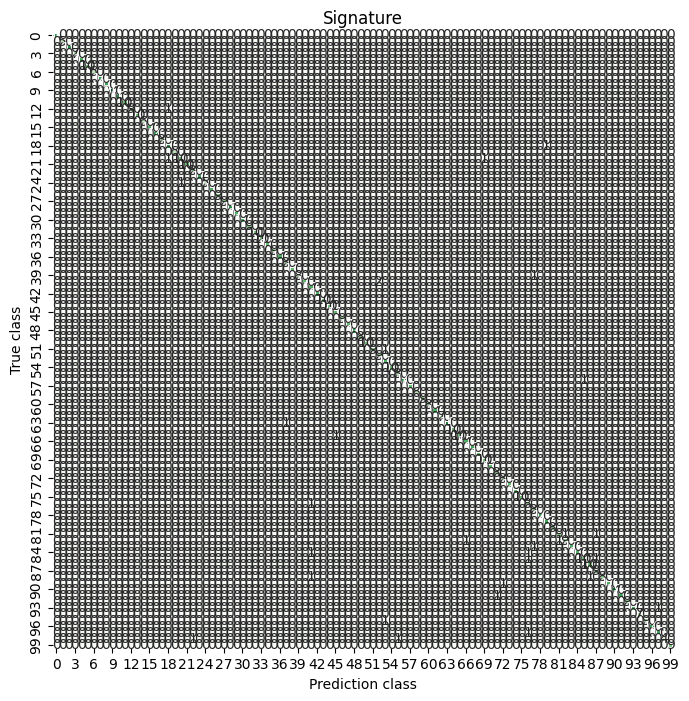

In [16]:
cm = confusion_matrix(actual, pred)
# cm_df = pd.DataFrame(cm)

plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True,cmap='Greens',cbar=False,linewidth=2,fmt='d')
plt.title('Signature')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()

In [17]:
cf = classification_report(actual, pred)
print(cf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        13
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        16
          11       1.00      1.00      1.00        10
          12       1.00      0.90      0.95        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00        12
          16       1.00      1.00      1.00        14
          17       1.00    